<center><h1>Data Preparation and Exploratory Data Analysis (EDA)</h1></center> 

First, it is described the general aspects of the dataset. Then, it is corrected some inconsistencies.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
dfCreditCard = pd.read_excel('.\datasets\creditCard.xlsx',header=1)

Printing the first 10 values of the Dataframe.

In [3]:
dfCreditCard.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Formatting dataframe

In [4]:
# Changing the name of the target variable
target_name = dfCreditCard.columns[-1]
dfCreditCard = dfCreditCard.rename(columns={target_name: 'DEF_PAYMENT'})
# Fixing the name of one column
dfCreditCard = dfCreditCard.rename(columns={'PAY_0': 'PAY_1'})

In [5]:
dfCreditCard = dfCreditCard.iloc[:,1:]

In [6]:
dfCreditCard.head().T

,0,1,2,3,4
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_1,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0
PAY_5,-2,0,0,0,0


- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit; numerical variable.
-  SEX: Gender (1 = male; 2 = female); categorical variable.
-  EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others); categorical variable.
-  MARRIAGE: Marital status (1 = married; 2 = single; 3 = others); categorical variable.
-  AGE: Age (year), numerical variable.
-  PAY_1 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above; categorical variable.
-  BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005; numerical variable.
-  PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005; numerical variable.
-  DEF_PAYMENT = Default payment in the next month, target variable (Yes = 1, No = 0); categorical variable.

Obtaining information about data count, null values, data types, etc.

In [7]:
dfCreditCard.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LIMIT_BAL    30000 non-null  int64
 1   SEX          30000 non-null  int64
 2   EDUCATION    30000 non-null  int64
 3   MARRIAGE     30000 non-null  int64
 4   AGE          30000 non-null  int64
 5   PAY_1        30000 non-null  int64
 6   PAY_2        30000 non-null  int64
 7   PAY_3        30000 non-null  int64
 8   PAY_4        30000 non-null  int64
 9   PAY_5        30000 non-null  int64
 10  PAY_6        30000 non-null  int64
 11  BILL_AMT1    30000 non-null  int64
 12  BILL_AMT2    30000 non-null  int64
 13  BILL_AMT3    30000 non-null  int64
 14  BILL_AMT4    30000 non-null  int64
 15  BILL_AMT5    30000 non-null  int64
 16  BILL_AMT6    30000 non-null  int64
 17  PAY_AMT1     30000 non-null  int64
 18  PAY_AMT2     30000 non-null  int64
 19  PAY_AMT3     30000 non-null  int64
 20  PAY_AM

In [8]:
# loop through all columns in the dataset
for col in dfCreditCard.columns:
    # convert the column to integer datatype
    dfCreditCard[col] = dfCreditCard[col].astype('int')

In [9]:
dfCreditCard.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LIMIT_BAL    30000 non-null  int32
 1   SEX          30000 non-null  int32
 2   EDUCATION    30000 non-null  int32
 3   MARRIAGE     30000 non-null  int32
 4   AGE          30000 non-null  int32
 5   PAY_1        30000 non-null  int32
 6   PAY_2        30000 non-null  int32
 7   PAY_3        30000 non-null  int32
 8   PAY_4        30000 non-null  int32
 9   PAY_5        30000 non-null  int32
 10  PAY_6        30000 non-null  int32
 11  BILL_AMT1    30000 non-null  int32
 12  BILL_AMT2    30000 non-null  int32
 13  BILL_AMT3    30000 non-null  int32
 14  BILL_AMT4    30000 non-null  int32
 15  BILL_AMT5    30000 non-null  int32
 16  BILL_AMT6    30000 non-null  int32
 17  PAY_AMT1     30000 non-null  int32
 18  PAY_AMT2     30000 non-null  int32
 19  PAY_AMT3     30000 non-null  int32
 20  PAY_AM

Printing general drescriptive statistics.

In [10]:
dfCreditCard.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Searching duplicated values.

In [11]:
dfCreditCard.duplicated().sum()

35

Values can not be the same because each data point belong to only one customer.

In [12]:
dfCreditCard = dfCreditCard.drop_duplicates().reset_index(drop=True)

Proportion of classes:

Default payment: No (y = 0)

Default payment: Yes (y = 1)

0    23335
1     6630
Name: DEF_PAYMENT, dtype: int64

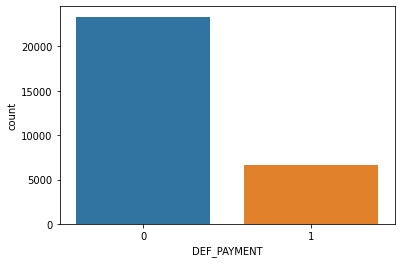

In [13]:
sns.countplot(x = "DEF_PAYMENT", data = dfCreditCard)
dfCreditCard.loc[:, "DEF_PAYMENT"].value_counts()

Fixing errors:

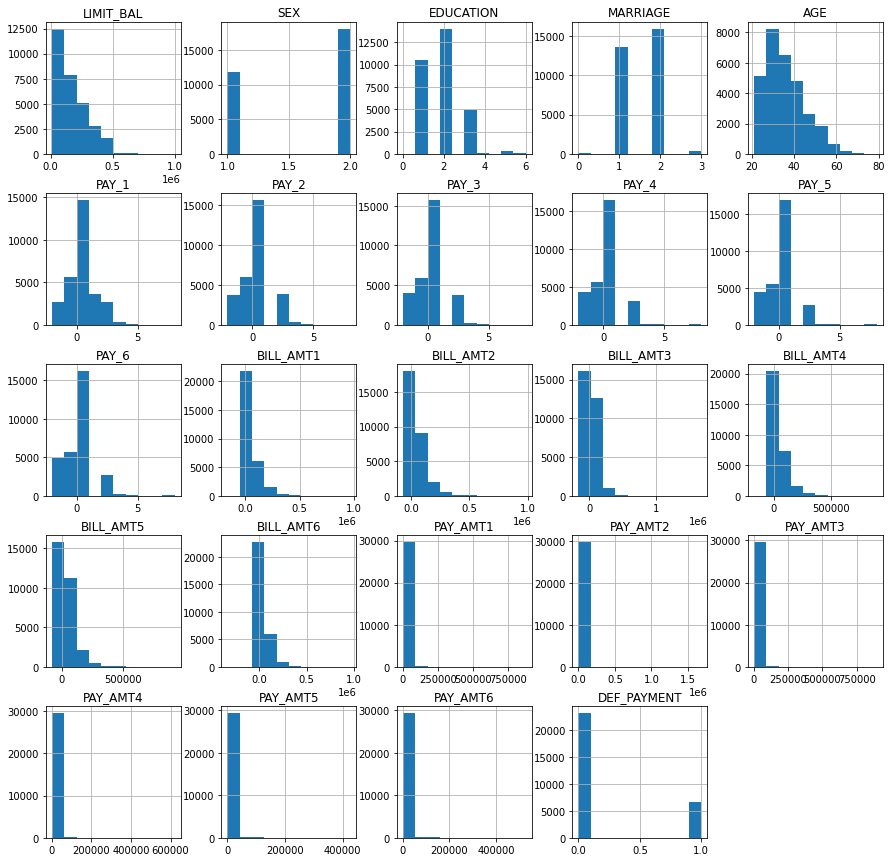

In [14]:
hist = dfCreditCard.hist(figsize = (15,15))

In [15]:
dfCreditCard["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

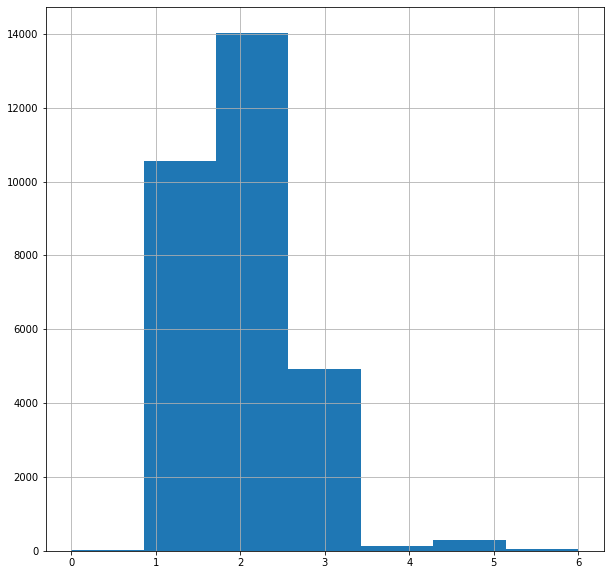

In [16]:
num_bins = len(dfCreditCard['EDUCATION'].unique())
dfCreditCard['EDUCATION'].hist(bins=num_bins,figsize = (10,10))
plt.show()

In [17]:
dfCreditCard["EDUCATION"] = dfCreditCard["EDUCATION"].replace([0, 5, 6], 4)

In [18]:
dfCreditCard["EDUCATION"].unique()

array([2, 1, 3, 4])

In [19]:
dfCreditCard["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [20]:
marriage_count = dfCreditCard["MARRIAGE"].value_counts()
marriage_count

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [21]:
round(marriage_count[3]/marriage_count.sum()*100,2)

1.08

It was reported by the Taiwan government a divorce rate of 2.26% nationwide. The 1.08% group found could belong to divorce people, but the source of the data only report labels of marital status of: 1 = married, 2 = single and 3 = others. Then, we have to joint 0 and 3 labels into one variable without more knowledge about the data.

In [22]:
dfCreditCard["MARRIAGE"] = dfCreditCard["MARRIAGE"].replace(0, 3)

<!-- Setting as int64 type categorical variables and float the numerical ones. -->

## Outliers

Outliers should be considered for the correlation method and data scaling.

In [23]:
#creating a list only with the numerical variables
cols_to_exclude = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
numerical_columns = dfCreditCard.drop(cols_to_exclude, axis=1).columns

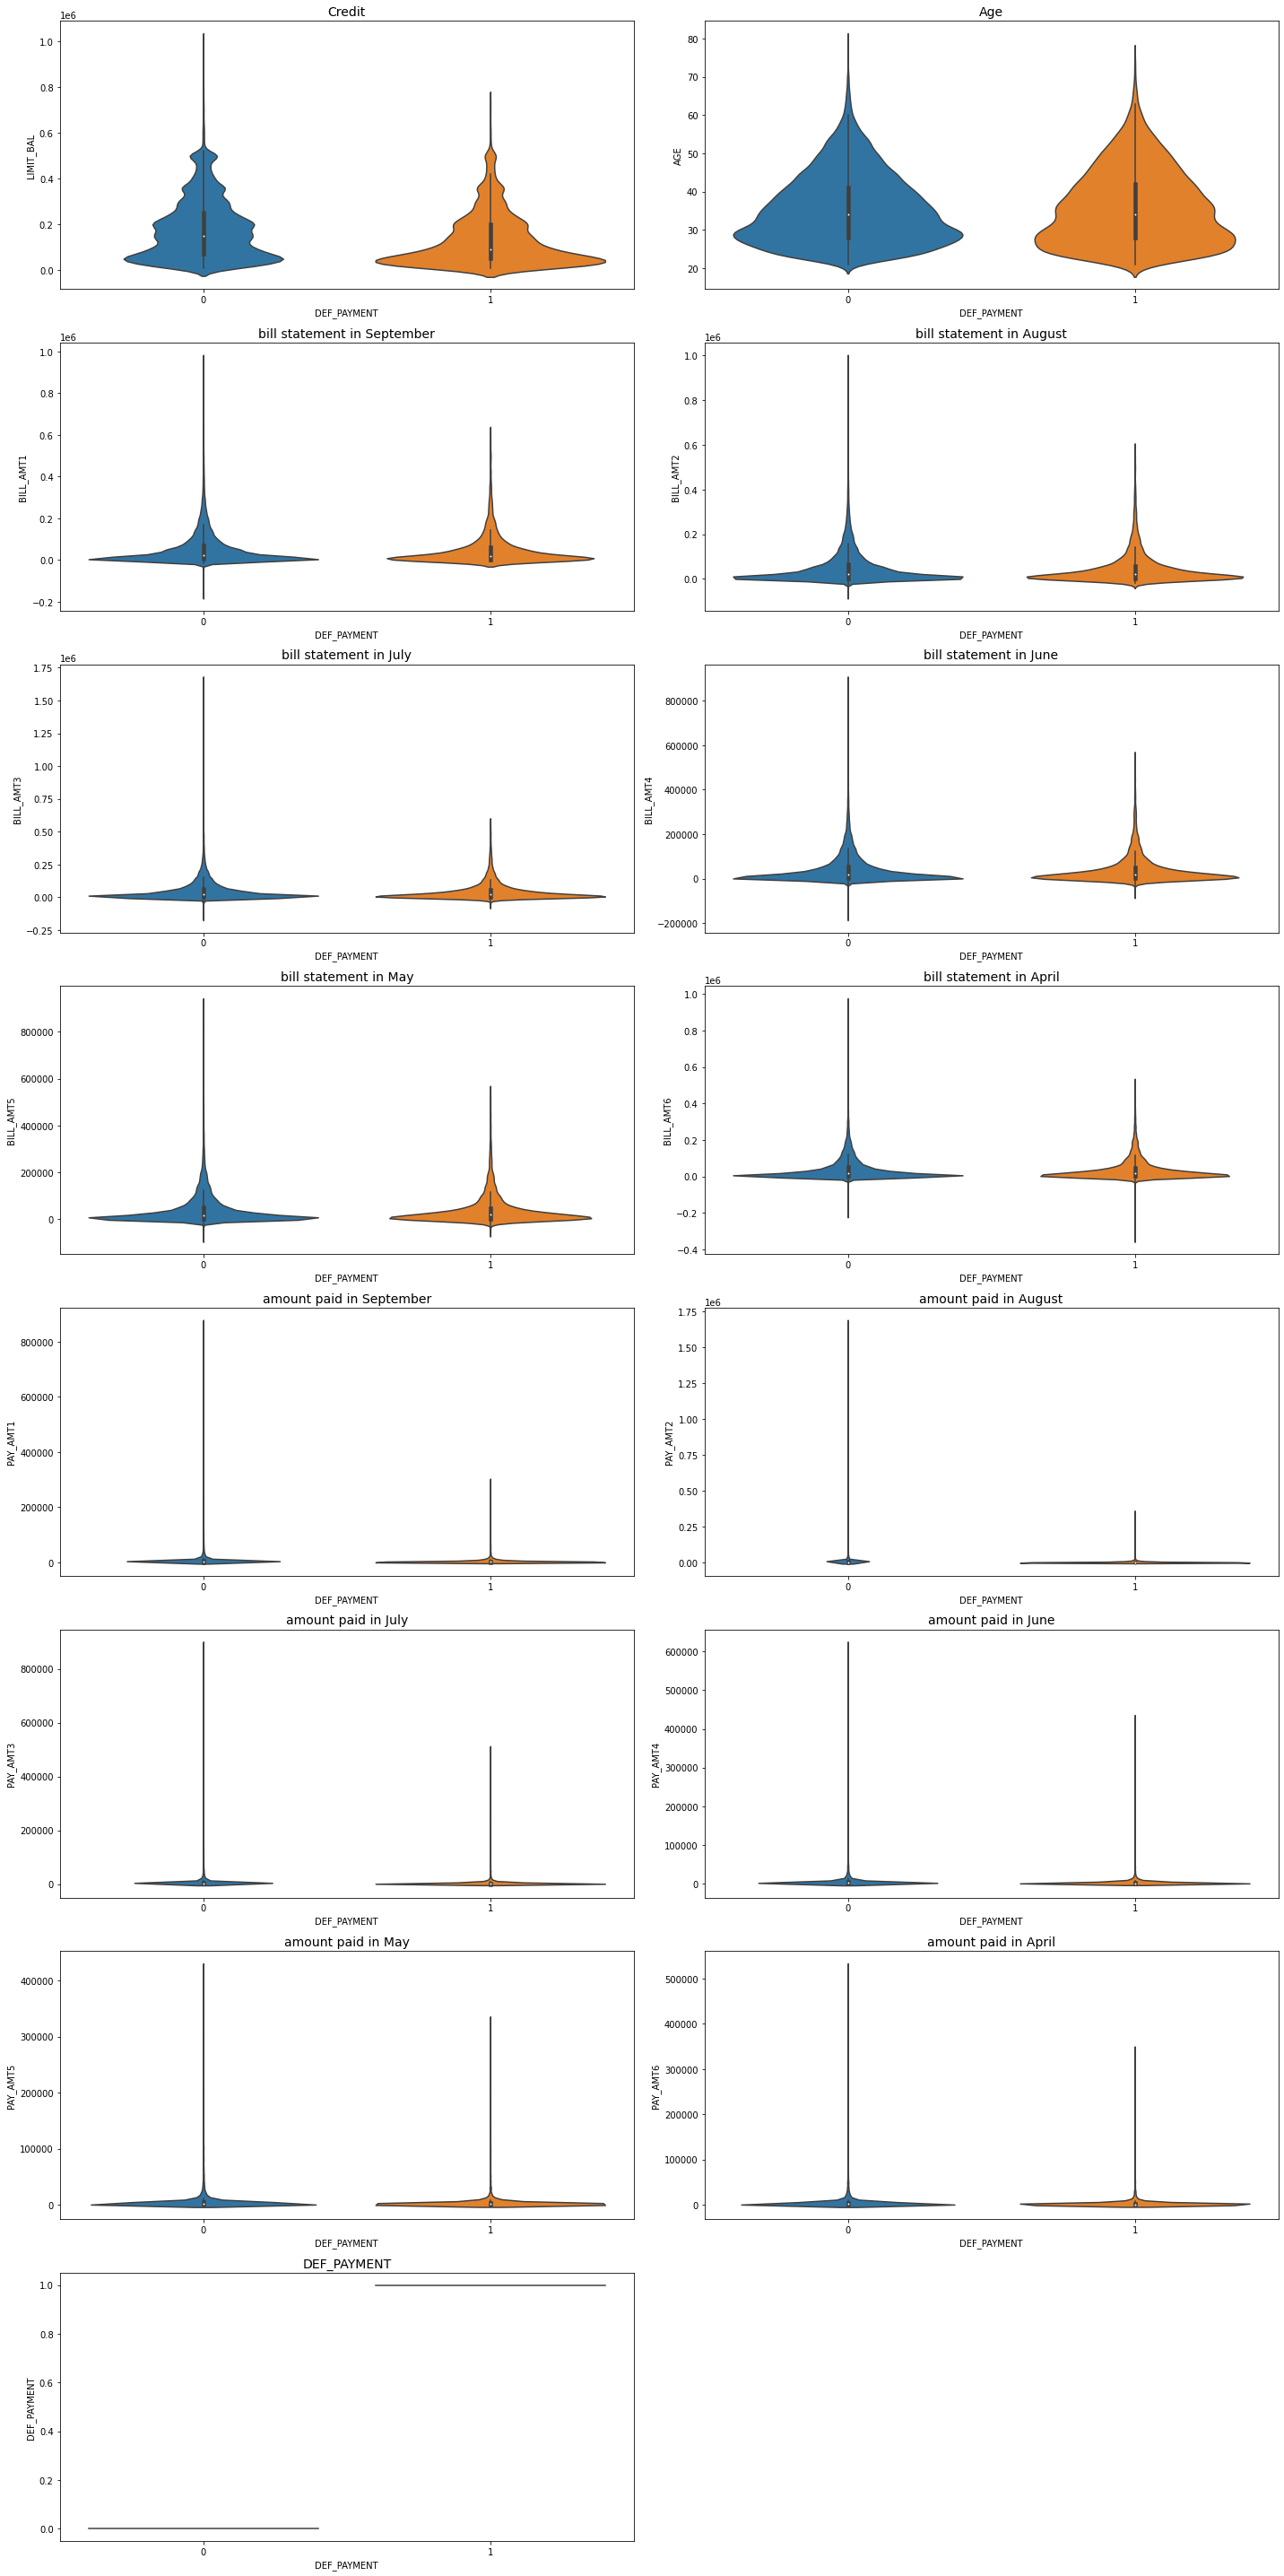

In [24]:
# Define the number of rows and columns for the subplots
nrows, ncols = 8,2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(numerical_columns):
    sns.violinplot(x="DEF_PAYMENT", y =col, data=dfCreditCard[numerical_columns], ax=axes[i])
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, numerical_columns):
    ax.set_title(col, fontsize=16)
    axes[0].set_title('Credit', fontsize=14)
    axes[1].set_title('Age', fontsize=14)
    axes[2].set_title('bill statement in September', fontsize=14)
    axes[3].set_title('bill statement in August', fontsize=14)
    axes[4].set_title('bill statement in July', fontsize=14)
    axes[5].set_title('bill statement in June', fontsize=14)
    axes[6].set_title('bill statement in May', fontsize=14)
    axes[7].set_title('bill statement in April', fontsize=14)
    axes[8].set_title('amount paid in September', fontsize=14)
    axes[9].set_title('amount paid in August', fontsize=14)
    axes[10].set_title('amount paid in July', fontsize=14)
    axes[11].set_title('amount paid in June', fontsize=14)
    axes[12].set_title('amount paid in May', fontsize=14)
    axes[13].set_title('amount paid in April', fontsize=14)
    axes[14].set_title('DEF_PAYMENT', fontsize=14)

fig.delaxes(axes[-1])
# Show the plot
plt.tight_layout()
plt.show()

There are significant outliers, they are far from the mayority of data points and can distort the overall pattern and relationships in the data. This data probably belongs to rich people who manage large amount of money. That data will be removed in order to reach a better performance in machine learning algorithms.

In [25]:
# Calculate the IQR for each numerical column
Q1 = dfCreditCard[numerical_columns].quantile(0.25)
Q3 = dfCreditCard[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Align the indices
dfCreditCard[numerical_columns], Q1 = dfCreditCard[numerical_columns].align(Q1, join='left', axis=1)
dfCreditCard[numerical_columns], Q3 = dfCreditCard[numerical_columns].align(Q3, join='left', axis=1)
dfCreditCard[numerical_columns], IQR = dfCreditCard[numerical_columns].align(IQR, join='left', axis=1)

# Identify outliers in each column
outliers = ((dfCreditCard[numerical_columns] < (Q1 - 1.5 * IQR)) | (dfCreditCard[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

LIMIT_BAL       167
AGE             272
BILL_AMT1      2386
BILL_AMT2      2390
BILL_AMT3      2469
BILL_AMT4      2616
BILL_AMT5      2724
BILL_AMT6      2688
PAY_AMT1       2742
PAY_AMT2       2723
PAY_AMT3       2596
PAY_AMT4       2993
PAY_AMT5       2944
PAY_AMT6       2960
DEF_PAYMENT    6630
dtype: int64


In [26]:
# False outliers in target variable.
# It belongs for Yes =1, the minority class.
outliers = outliers.iloc[:,:-1]
# Identify the outlier rows in the original dataset
outlier_rows = outliers.any(axis=1)

# Remove the outlier rows from the original dataset
dfCreditCard = dfCreditCard.loc[~outlier_rows].reset_index(drop=True)

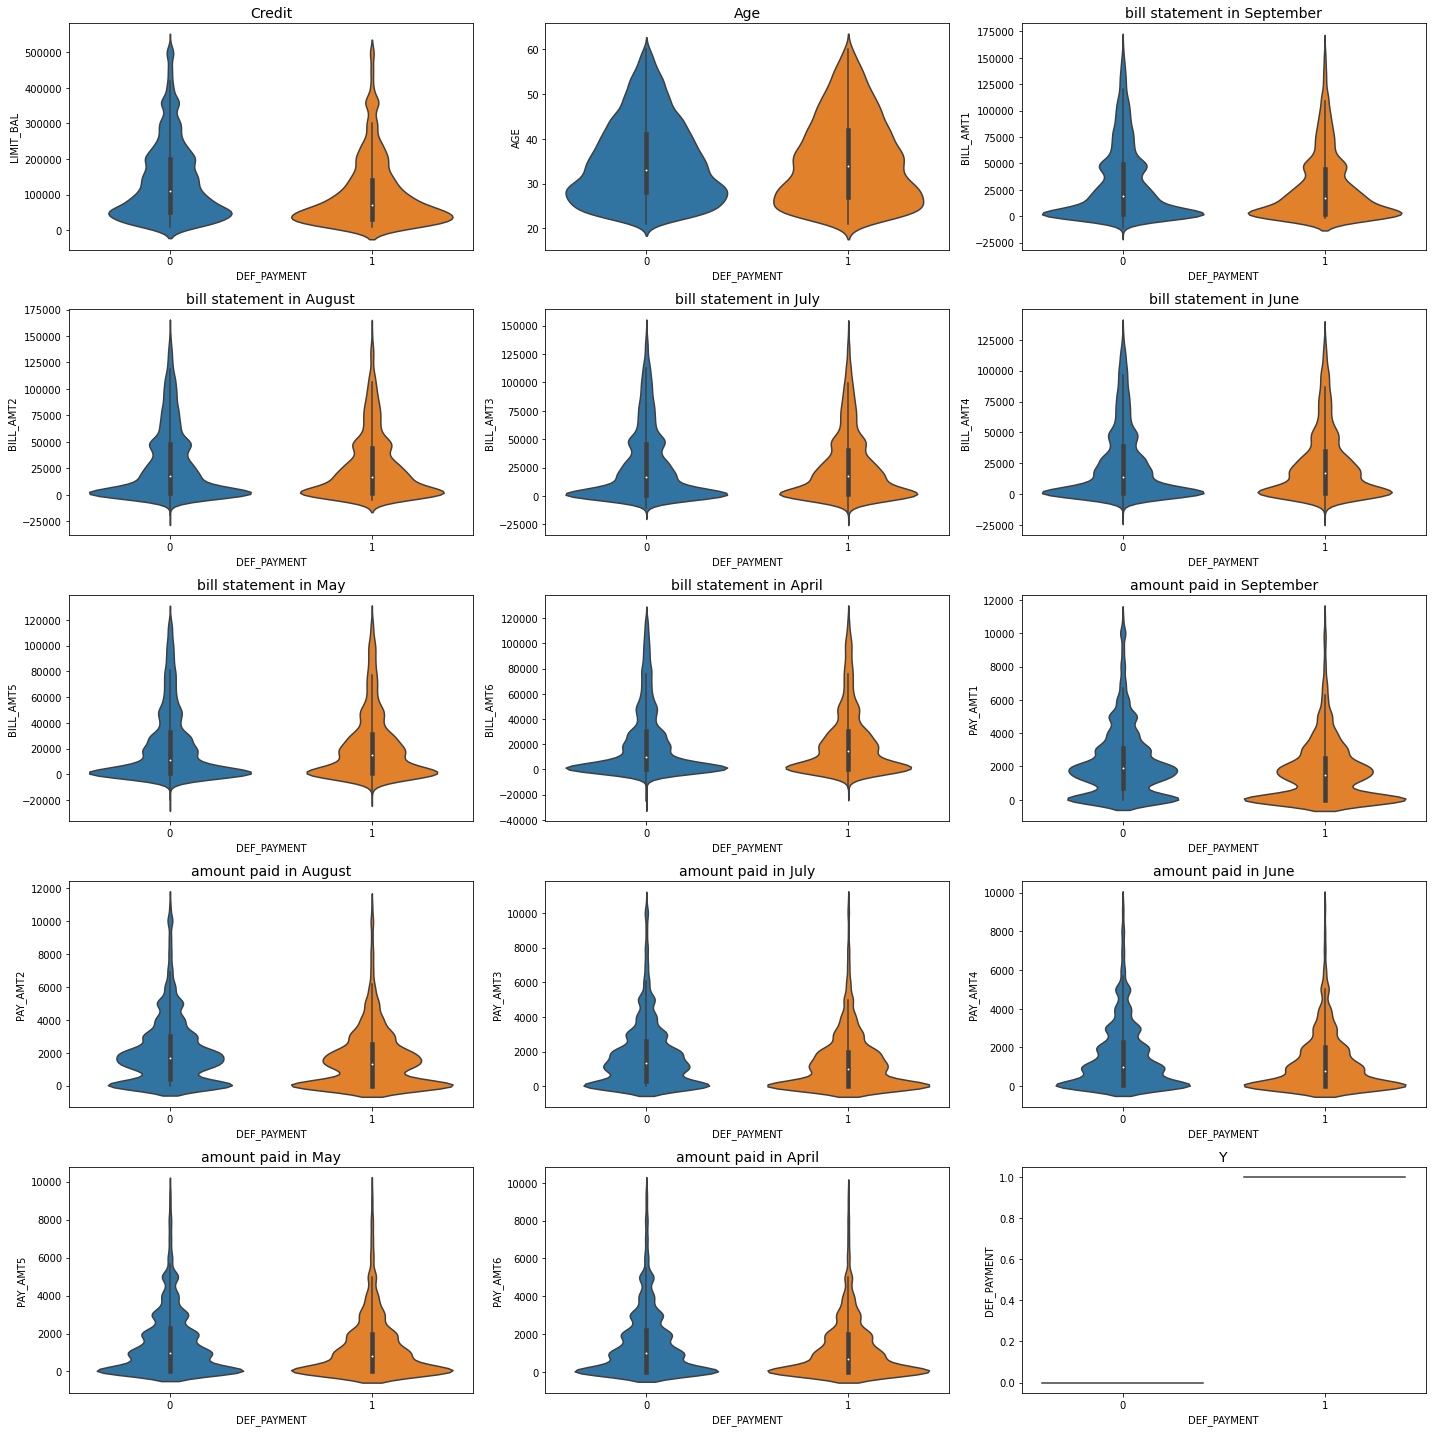

In [27]:
# Define the number of rows and columns for the subplots
nrows, ncols = 5,3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfCreditCard[numerical_columns].columns):
    sns.violinplot(x="DEF_PAYMENT", y =col, data=dfCreditCard[numerical_columns], ax=axes[i])
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfCreditCard[numerical_columns].columns):
    ax.set_title(col, fontsize=16)
    axes[0].set_title('Credit', fontsize=14)
    axes[1].set_title('Age', fontsize=14)
    axes[2].set_title('bill statement in September', fontsize=14)
    axes[3].set_title('bill statement in August', fontsize=14)
    axes[4].set_title('bill statement in July', fontsize=14)
    axes[5].set_title('bill statement in June', fontsize=14)
    axes[6].set_title('bill statement in May', fontsize=14)
    axes[7].set_title('bill statement in April', fontsize=14)
    axes[8].set_title('amount paid in September', fontsize=14)
    axes[9].set_title('amount paid in August', fontsize=14)
    axes[10].set_title('amount paid in July', fontsize=14)
    axes[11].set_title('amount paid in June', fontsize=14)
    axes[12].set_title('amount paid in May', fontsize=14)
    axes[13].set_title('amount paid in April', fontsize=14)
    axes[14].set_title('Y', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Checking the new proportions of classes:

0    14475
1     5038
Name: DEF_PAYMENT, dtype: int64

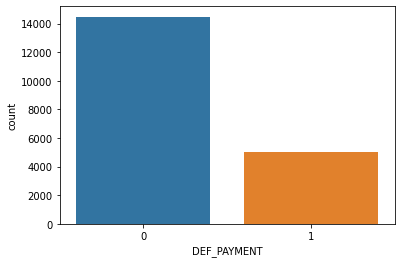

In [28]:
sns.countplot(x = "DEF_PAYMENT", data = dfCreditCard)
dfCreditCard.loc[:, "DEF_PAYMENT"].value_counts()

In [29]:
dfCreditCard["DEF_PAYMENT"].unique()

array([1, 0])

In [30]:
dfCreditCard

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19508,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
19509,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
19510,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
19511,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


No considerable amount of minority class data has been lost.

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Selecting the categorical columns
non_numerical_columns = cols_to_exclude
# Create an instance of the OneHotEncoder class
onehot_encoder = OneHotEncoder(sparse_output=True)

# Encode the categorical variables using one-hot encoding
onehot_sparse = onehot_encoder.fit_transform(dfCreditCard[non_numerical_columns])
# Convert the encoded data to a pandas DataFrame
onehot_df = pd.DataFrame.sparse.from_spmatrix(onehot_sparse, columns=onehot_encoder.get_feature_names_out(non_numerical_columns))

In [32]:
# Concatenate the one-hot encoded data with the original data
dfCreditCard = pd.concat([onehot_df,dfCreditCard], axis=1)

# Drop the original categorical columns
dfCreditCard = dfCreditCard.drop(non_numerical_columns, axis=1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dfCreditCardScaled = dfCreditCard.copy()
dfCreditCardScaled[numerical_columns] = scaler.fit_transform(dfCreditCardScaled[numerical_columns])

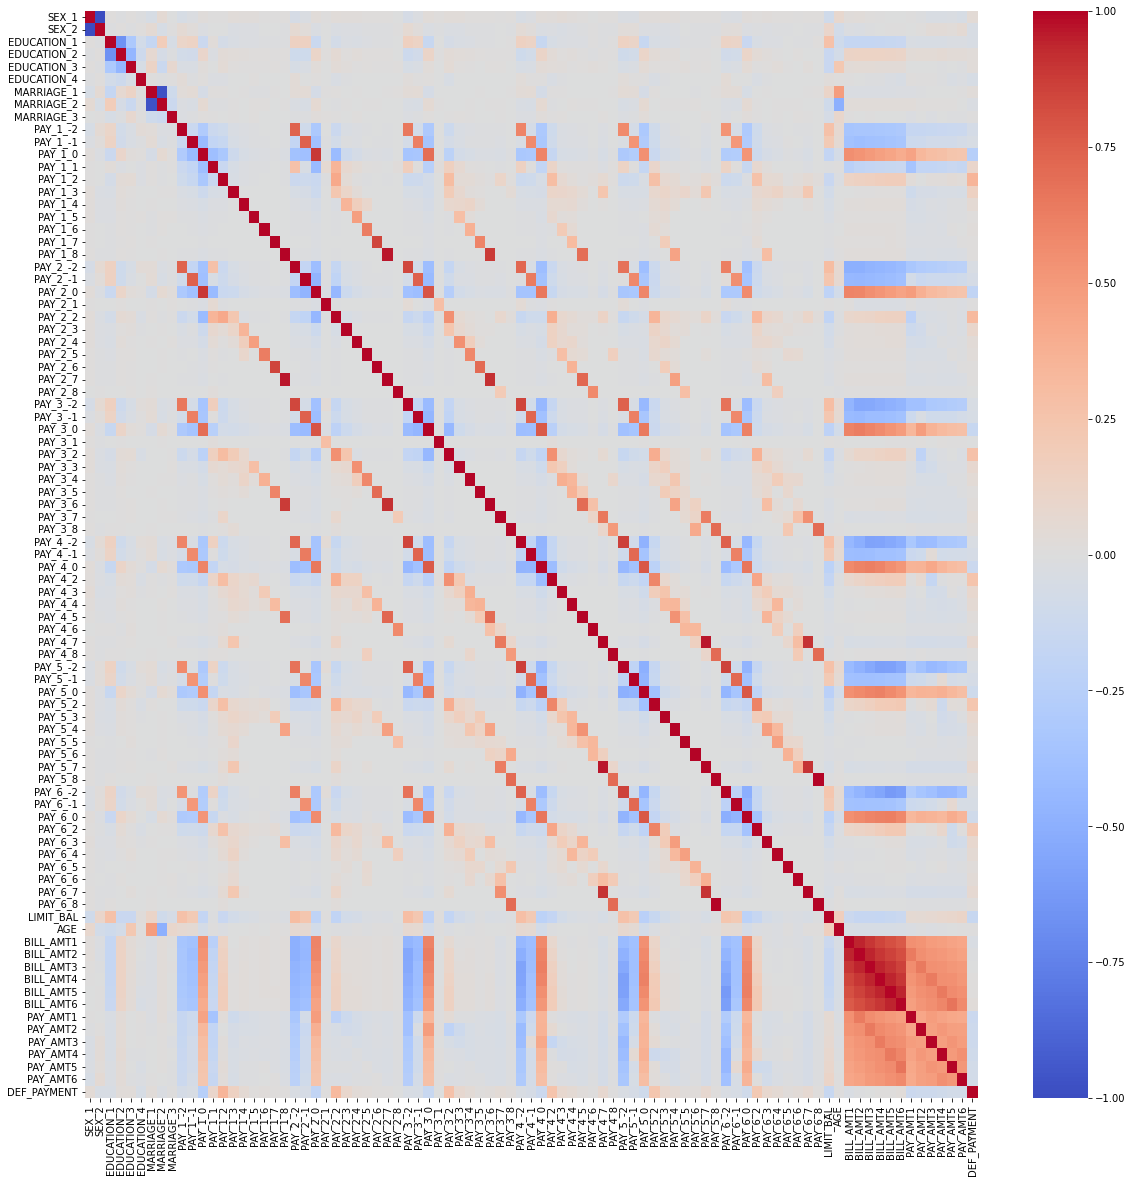

In [34]:
# Calculating correlation
corr_df = dfCreditCardScaled.corr(method ='spearman')
# Creating heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=False, cmap='coolwarm')

# Showing heatmap
plt.show()

In [35]:
# stack() function converts the correlation matrix into a long format, 
# where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs_greater = corr_df[corr_df > 0.2].stack().reset_index()
corr_pairs_less = corr_df[corr_df < -0.2].stack().reset_index()

# Eliminating duplicates
corr_pairs_greater = corr_pairs_greater[corr_pairs_greater['level_0'] < corr_pairs_greater['level_1']]
corr_pairs_less = corr_pairs_less[corr_pairs_less['level_0'] < corr_pairs_less['level_1']]

# Formatting the output
corr_pairs_greater = corr_pairs_greater.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs_less = corr_pairs_less.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})

corr_pairs_greater = corr_pairs_greater.sort_values(by='corr', ascending=False)
corr_pairs_less = corr_pairs_less.sort_values(by='corr', ascending=True)

# Selecting rows with "DEF_PAYMENT" in either column
corr_pairs_greater = corr_pairs_greater[corr_pairs_greater['col1'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna() | corr_pairs_greater['col2'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna()]
corr_pairs_less = corr_pairs_less[corr_pairs_less['col1'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna() | corr_pairs_less['col2'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna()]

# Resetting the index
corr_pairs_greater = corr_pairs_greater.reset_index(drop=True)
corr_pairs_less = corr_pairs_less.reset_index(drop=True)

# Combining the tables
from IPython.display import display_html

# Applying CSS to the tables
styles = [dict(selector='table', props=[('margin', '0 auto')]),
          dict(selector='th', props=[('text-align', 'center'),                                      
                                     ('padding', '5px'),                                     
                                     ('background-color', '#0074D9'),                                     
                                     ('color', 'white')]),
          dict(selector='td', props=[('padding', '5px'),                                     
                                     ('text-align', 'center')]),
          dict(selector='th:first-child, td:first-child', props=[('text-align', 'left')])]

html_greater = corr_pairs_greater.to_html()
html_less = corr_pairs_less.to_html()

display_html(f'<table><tr><td>{html_greater}</td><td>{html_less}</td></tr></table>',
             raw=True, 
             # applying styles
             metadata={'text/html': {'isolated': 'True',
                                     'container': '%s',
                                     'styles': styles}})

,col1,col2,corr
0,DEF_PAYMENT,PAY_1_2,0.347597
1,DEF_PAYMENT,PAY_2_2,0.314555
2,DEF_PAYMENT,PAY_3_2,0.268517
3,DEF_PAYMENT,PAY_4_2,0.252474
4,DEF_PAYMENT,PAY_5_2,0.235075
5,DEF_PAYMENT,PAY_6_2,0.217100
,col1,col2,corr
0,DEF_PAYMENT,PAY_1_0,-0.254904


In [36]:
# stack() function converts the correlation matrix into a long format, 
# where each row contains a pair of columns and their correlation
# reset_index() function converts the row and column indexes into regular columns
corr_pairs_greater = corr_df[corr_df > 0.6].stack().reset_index()
corr_pairs_less = corr_df[corr_df < -0.6].stack().reset_index()

# Eliminating duplicates
corr_pairs_greater = corr_pairs_greater[corr_pairs_greater['level_0'] < corr_pairs_greater['level_1']]
corr_pairs_less = corr_pairs_less[corr_pairs_less['level_0'] < corr_pairs_less['level_1']]

# Formatting the output
corr_pairs_greater = corr_pairs_greater.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})
corr_pairs_less = corr_pairs_less.rename(columns={'level_0':'col1', 'level_1':'col2', 0:'corr'})

corr_pairs_greater = corr_pairs_greater.sort_values(by='corr', ascending=False)
corr_pairs_less = corr_pairs_less.sort_values(by='corr', ascending=True)

# Selecting rows with "DEF_PAYMENT" in either column
corr_pairs_greater = corr_pairs_greater[~(corr_pairs_greater['col1'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna() | corr_pairs_greater['col2'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna())]
corr_pairs_less = corr_pairs_less[~(corr_pairs_less['col1'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna() | corr_pairs_less['col2'].str.extract(pat='(DEF_PAYMENT)', expand=False).notna())]

# Resetting the index
corr_pairs_greater = corr_pairs_greater.reset_index(drop=True)
corr_pairs_less = corr_pairs_less.reset_index(drop=True)

# Combining the tables
from IPython.display import display_html

# Applying CSS to the tables
styles = [dict(selector='table', props=[('margin', '0 auto')]),
          dict(selector='th', props=[('text-align', 'center'),                                      
                                     ('padding', '5px'),                                     
                                     ('background-color', '#0074D9'),                                     
                                     ('color', 'white')]),
          dict(selector='td', props=[('padding', '5px'),                                     
                                     ('text-align', 'center')]),
          dict(selector='th:first-child, td:first-child', props=[('text-align', 'left')])]

html_greater = corr_pairs_greater.to_html()
html_less = corr_pairs_less.to_html()

display_html(f'<table><tr><td>{html_greater}</td><td>{html_less}</td></tr></table>',
             raw=True, 
             # applying styles
             metadata={'text/html': {'isolated': 'True',
                                     'container': '%s',
                                     'styles': styles}})

,col1,col2,corr
0,PAY_5_8,PAY_6_8,1.000000
1,PAY_1_8,PAY_2_7,0.966067
2,PAY_4_7,PAY_5_7,0.964183
3,BILL_AMT3,BILL_AMT4,0.942021
4,BILL_AMT2,BILL_AMT3,0.941854
5,BILL_AMT5,BILL_AMT6,0.941053
6,BILL_AMT4,BILL_AMT5,0.940806
7,BILL_AMT1,BILL_AMT2,0.940680
8,PAY_2_7,PAY_3_6,0.912801
9,PAY_5_7,PAY_6_7,0.906094


High correlations between predictor variables and low correlation between predictors and target variable.

<!-- Scaling numerical data (avoiding categorical ones) -->

In [37]:
dfCreditCard

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAYMENT
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,689,0,0,0,0,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19508,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2500,2500,2500,0,0,0,0,0,0,1
19509,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,2000,0,0,0,0,0,0
19510,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
19511,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,8979,5190,0,1837,3526,8998,129,0,0,0


Saving in a CSV.

In [38]:
dfCreditCard.to_csv(".\datasets\creditCard_preprocessed.csv",index=False)